Shawn Aslam
CMSE 492
10/31/2025


B1. Data Acquisition and Loading

The data set containing 200 rows, is obtained from a myriad of scientific/research/textbook/industrial sources containing experimental runs for the gasification of biomass feedstock, which have been analyzed by GPT 5 AI and compiled/presented in an excel file. 



In [10]:
# Load the Data

import pandas as pd
from IPython.display import display

PATH = "synthetic_biomass_gasification_200rows_v3.csv"
df = pd.read_csv(PATH)


display(df.head())
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)

print("\nInfo:")
print(df.info())


display(df.describe(include="number").round(3))


,Temperature_C,ER,Gasifying_Agent,Reactor_Type,Moisture_wt_pct,Pressure_bar,H2_mol_per_Nm3,CO2_mol_per_Nm3,CO_mol_per_Nm3,CH4_mol_per_Nm3,N2_mol_per_Nm3,tar_g_per_Nm3,char_g_per_kg_feed
0,880.0,0.000,Steam,DFB,7.8,1.0,22.30,10.90,9.26,1.440,0.237,0.290,7.53
1,833.0,0.369,Air,CFB,10.8,1.0,3.57,8.09,6.57,0.361,25.600,0.677,13.70
2,990.0,0.000,Steam,Downdraft,13.8,5.0,22.30,10.30,8.74,2.500,0.229,0.111,6.80
3,933.0,0.109,Steam+O2,CFB,19.8,1.0,19.50,8.07,14.50,1.070,1.050,1.300,14.10
4,773.0,0.000,Steam,CFB,22.6,15.0,19.10,12.80,6.98,4.840,0.204,3.740,42.60


Shape: (200, 13)

Dtypes:
 Temperature_C         float64
ER                    float64
Gasifying_Agent        object
Reactor_Type           object
Moisture_wt_pct       float64
Pressure_bar          float64
H2_mol_per_Nm3        float64
CO2_mol_per_Nm3       float64
CO_mol_per_Nm3        float64
CH4_mol_per_Nm3       float64
N2_mol_per_Nm3        float64
tar_g_per_Nm3         float64
char_g_per_kg_feed    float64
dtype: object

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature_C       200 non-null    float64
 1   ER                  200 non-null    float64
 2   Gasifying_Agent     200 non-null    object 
 3   Reactor_Type        200 non-null    object 
 4   Moisture_wt_pct     200 non-null    float64
 5   Pressure_bar        200 non-null    float64
 6   H2_mol_per_Nm3      200 non-null    float64
 7   CO2_mol_per

,Temperature_C,ER,Moisture_wt_pct,Pressure_bar,H2_mol_per_Nm3,CO2_mol_per_Nm3,CO_mol_per_Nm3,CH4_mol_per_Nm3,N2_mol_per_Nm3,tar_g_per_Nm3,char_g_per_kg_feed
count,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000,200.000
mean,837.775,0.224,15.544,4.100,10.795,9.042,9.899,1.654,12.753,2.129,17.764
std,56.025,0.118,6.115,5.256,7.406,1.913,3.751,1.138,12.126,2.325,10.262
min,705.000,0.000,2.000,1.000,0.661,5.090,4.190,0.040,0.113,0.037,4.330
25%,799.000,0.164,11.600,1.000,3.698,7.547,6.785,0.767,0.503,0.338,9.753
50%,835.000,0.229,16.300,1.000,9.690,9.110,8.530,1.375,12.250,1.155,14.350
75%,868.250,0.306,19.425,5.000,17.900,10.500,13.700,2.545,24.900,3.275,23.075
max,1000.000,0.442,34.400,20.000,22.700,13.700,17.000,4.840,26.800,13.600,57.100


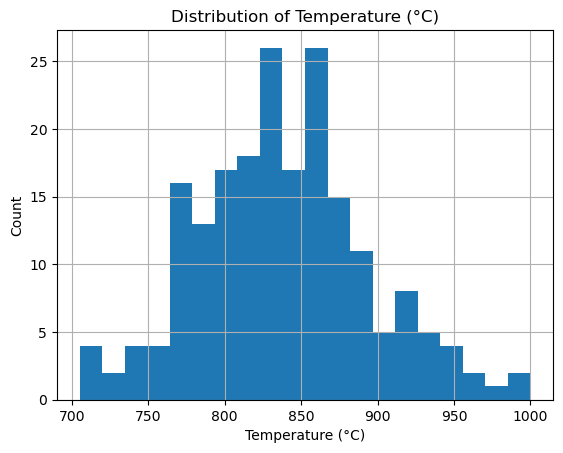

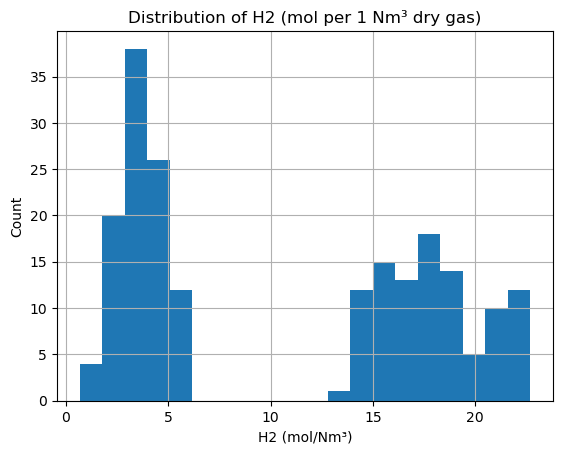

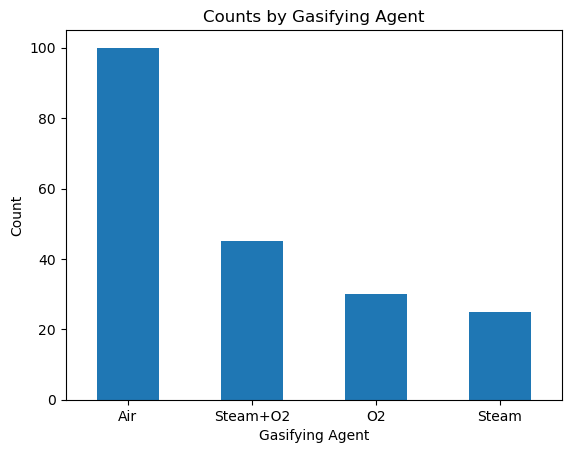

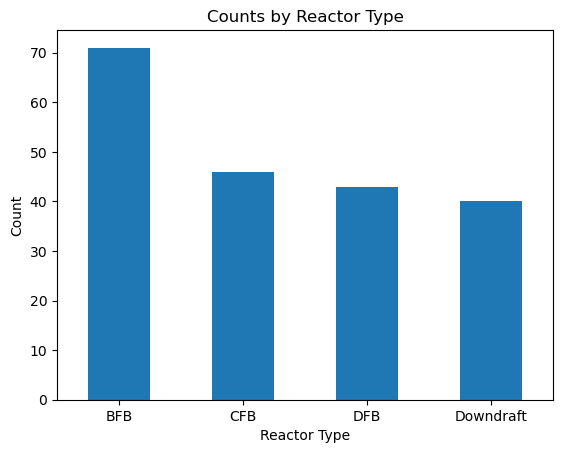

In [11]:
# B2. Initial Exploratory Data Analysis
import matplotlib.pyplot as plt

# Temperature distribution
plt.figure()
df["Temperature_C"].hist(bins=20)
plt.title("Distribution of Temperature (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.show()

# Target distribution example: H2 (mol per 1 Nm³ dry gas)
plt.figure()
df["H2_mol_per_Nm3"].hist(bins=20)
plt.title("Distribution of H2 (mol per 1 Nm³ dry gas)")
plt.xlabel("H2 (mol/Nm³)")
plt.ylabel("Count")
plt.show()

# Gasifying agent counts
plt.figure()
df["Gasifying_Agent"].value_counts().plot(kind="bar")
plt.title("Counts by Gasifying Agent")
plt.xlabel("Gasifying Agent")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Reactor type counts
plt.figure()
df["Reactor_Type"].value_counts().plot(kind="bar")
plt.title("Counts by Reactor Type")
plt.xlabel("Reactor Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

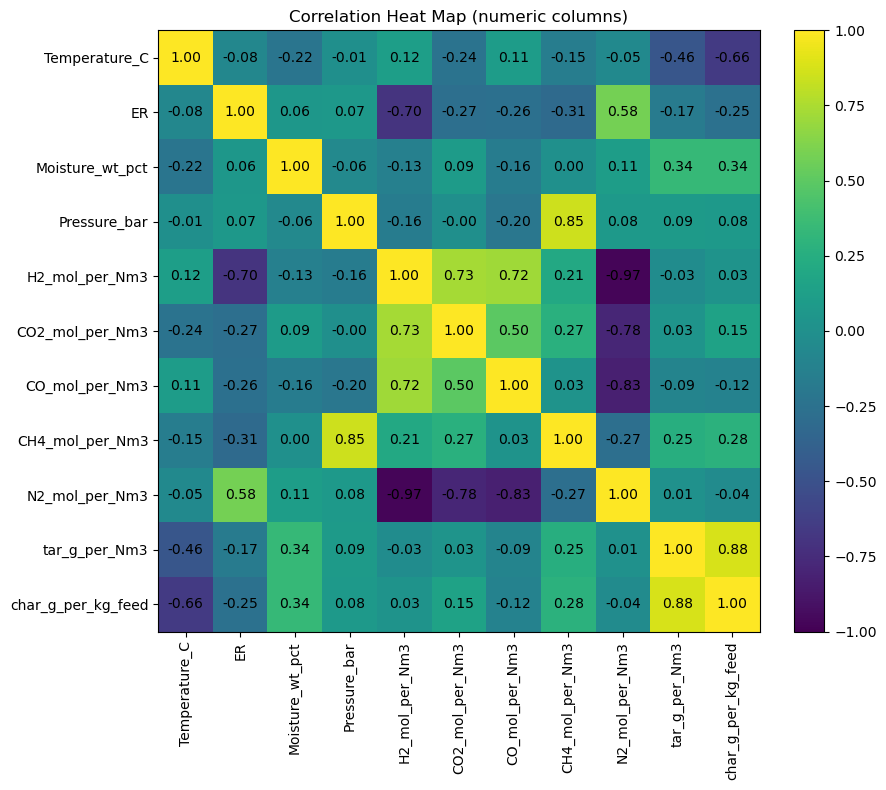

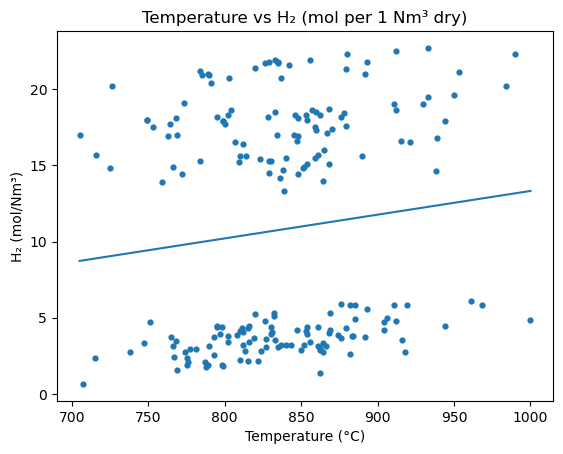

Spearman ρ(T, H2): 0.207


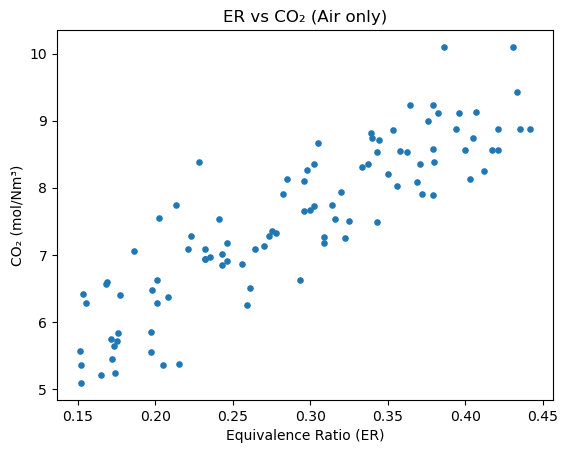

Spearman ρ(ER, CO2) for Air: 0.891


In [12]:
# B2. Initial Exploratory Data Analysis


import numpy as np
import matplotlib.pyplot as plt

# Heat Correlation Map
num_cols = df.select_dtypes(include=["number"]).columns
corr = df[num_cols].corr(method="pearson")

plt.figure(figsize=(10, 8))
im = plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)


plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)


for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        val = corr.iat[i, j]
        plt.text(j, i, f"{val:.2f}", ha="center", va="center")  # change .2f to .3f if you prefer

plt.title("Correlation Heat Map (numeric columns)")
plt.tight_layout()
plt.show()


# Temperature vs H2 (expected positive trend)
x = df["Temperature_C"].values
y = df["H2_mol_per_Nm3"].values
coef = np.polyfit(x, y, deg=1)
fit = np.poly1d(coef)

plt.figure()
plt.scatter(x, y, s=12)
xline = np.linspace(x.min(), x.max(), 100)
plt.plot(xline, fit(xline))
plt.title("Temperature vs H₂ (mol per 1 Nm³ dry)")
plt.xlabel("Temperature (°C)")
plt.ylabel("H₂ (mol/Nm³)")
plt.show()

print("Spearman ρ(T, H2):", round(pd.Series(x).corr(pd.Series(y), method="spearman"), 3))

# ER vs CO2 for Air only (expected positive)
air = df[df["Gasifying_Agent"] == "Air"]
plt.figure()
plt.scatter(air["ER"], air["CO2_mol_per_Nm3"], s=14)
plt.title("ER vs CO₂ (Air only)")
plt.xlabel("Equivalence Ratio (ER)")
plt.ylabel("CO₂ (mol/Nm³)")
plt.show()

print("Spearman ρ(ER, CO2) for Air:", round(air["ER"].corr(air["CO2_mol_per_Nm3"], method="spearman"), 3))

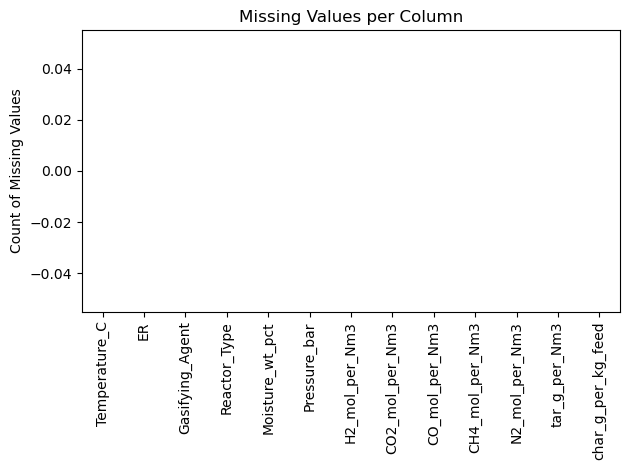

Total missing values: 0


In [13]:
# B2

import matplotlib.pyplot as plt

# missing values

na_counts = df.isna().sum()

plt.figure()
na_counts.plot(kind="bar")
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Total missing values:", int(na_counts.sum()))


In [17]:
# B3 — Baseline model

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error




# Features (X) and targets (y)

X_cols = ["Temperature_C", "ER", "Gasifying_Agent", "Reactor_Type",
          "Moisture_wt_pct", "Pressure_bar"]

y_cols = ["H2_mol_per_Nm3","CO2_mol_per_Nm3","CO_mol_per_Nm3","CH4_mol_per_Nm3",
          "N2_mol_per_Nm3","tar_g_per_Nm3","char_g_per_kg_feed"]

X = df[X_cols].copy()
y = df[y_cols].copy()

# Handle any NAs (synthetic usually has none)
if X.isna().any().any(): X = X.fillna(X.median(numeric_only=True))
if y.isna().any().any(): y = y.fillna(y.median(numeric_only=True))


# Train / test split (80/20)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


# Preprocess + model pipeline

cat_cols = ["Gasifying_Agent", "Reactor_Type"]
num_cols = [c for c in X_cols if c not in cat_cols]

# OneHotEncoder
try:
    
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", ohe, cat_cols),
        ("num", "passthrough", num_cols),
    ],
    remainder="drop",
)

model = Pipeline(steps=[
    ("prep", preprocess),
    ("lin", LinearRegression())
])

model.fit(X_train, y_train)


# Predictions

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)


# Metrics

def rmse_vec(y_true_1d, y_pred_1d):
    y_true_1d = np.asarray(y_true_1d, dtype=float)
    y_pred_1d = np.asarray(y_pred_1d, dtype=float)
    return float(np.sqrt(np.mean((y_true_1d - y_pred_1d) ** 2)))

def per_target_metrics(y_true_df, y_pred_arr, names):
    rows = []
    for i, name in enumerate(names):
        yt = y_true_df.iloc[:, i].values
        yp = y_pred_arr[:, i]
        rows.append({
            "target": name,
            "R2":   r2_score(yt, yp),
            "MAE":  mean_absolute_error(yt, yp),
            "RMSE": rmse_vec(yt, yp),
        })
    return pd.DataFrame(rows)

test_metrics  = per_target_metrics(y_test,  y_pred_test,  y_cols)
train_metrics = per_target_metrics(y_train, y_pred_train, y_cols)

# R² 
variances = y_test.var(axis=0, ddof=0).values
overall_r2 = float(np.average(test_metrics["R2"].values, weights=variances))


print("=== Baseline: Linear Regression ===")
print(f"Train size: {len(X_train)}, Test size: {len(X_test)}\n")

print("Test metrics per target:")
from IPython.display import display
display(test_metrics.round(3))

print("\nSimple averages (test):")
print(test_metrics[["R2","MAE","RMSE"]].mean().round(3))

print("\nVariance‑weighted overall R² (test):", round(overall_r2, 3))



=== Baseline: Linear Regression ===
Train size: 160, Test size: 40

Test metrics per target:


,target,R2,MAE,RMSE
0,H2_mol_per_Nm3,0.999,0.214,0.275
1,CO2_mol_per_Nm3,0.994,0.120,0.147
2,CO_mol_per_Nm3,0.994,0.202,0.267
3,CH4_mol_per_Nm3,0.876,0.279,0.409
4,N2_mol_per_Nm3,0.999,0.282,0.345
5,tar_g_per_Nm3,0.832,0.726,0.952
6,char_g_per_kg_feed,0.919,2.190,2.810



Simple averages (test):
R2      0.945
MAE     0.573
RMSE    0.743
dtype: float64

Variance‑weighted overall R² (test): 0.971
